# Unsupervised Learning Challenge
#### Glen Dagger

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [52]:
# Read in myopia dataset
df = pd.read_csv("./Resources/myopia.csv")

# Preview dataframe
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [8]:
# Remove "MYOPIC" column from dataframe
df2 = df.drop("MYOPIC", axis=1)

# Preview dataframe
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [57]:
# Standardize dataset

scaler = StandardScaler()
data_standardized = scaler.fit_transform(df2)

### Part 2: Apply Dimensionality Reduction

In [96]:
# Apply PCA for dimensionality reduction

# Initialize PCA model to preserve 90% of explained variance
pca = PCA(n_components=0.9)

# Get principal components for the standardized myopia data
myopia_pca = pca.fit_transform(data_standardized)

In [97]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca
)

# Preview PCA dataframe
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.431637,1.445709,-1.331828,-0.693850,-2.269209,-3.247327,0.513563,2.552036,-0.248169,0.158170
1,-0.906821,-1.269479,-1.729957,0.737462,-0.653906,0.612570,-0.393927,0.276630,0.618332,-0.591840
2,-1.003830,-0.952485,1.060138,-1.052591,0.992750,0.095297,0.217329,0.047943,-0.246502,0.047286
3,0.043489,1.358773,-0.646616,1.069655,-2.091841,-1.246505,1.675870,0.687895,-1.103025,-0.630066
4,-0.085553,-2.660602,-1.298630,-0.497394,0.703030,-0.771646,0.967596,0.034764,-0.177292,0.575916


In [98]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

# Check for reduced number of features (2 columns)
tsne_features.shape

/Users/glena.dagger/Downloads/anaconda3/envs/PythonDataOne/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

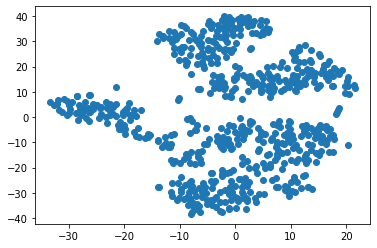

In [99]:
# Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

There appear to be roughly 4-6 distinct clusters in the scatter plot.

### Part 3: Perform a Cluster Analysis with K-Means

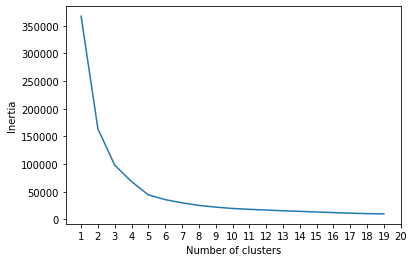

In [112]:
inertia = []

k = list(range(1,20))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,21))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [114]:
# Initializing model with K = 5
model_km = KMeans(n_clusters=5, random_state=1)

# Fitting model
model_km.fit(tsne_features)

km_data = pd.DataFrame(tsne_features)
km_data["class"] = model_km.labels_

km_data.head()


,0,1,class
0,6.208401,-19.612734,3
1,-7.955678,-28.396296,0
2,6.606483,13.032699,1
3,-0.308179,-21.046343,0
4,-0.343897,-3.515981,3


### Part 4: Make a Recommendation

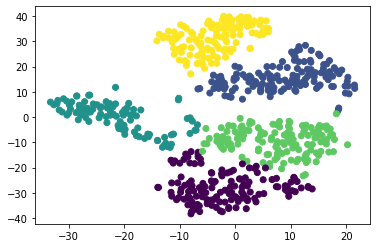

In [115]:
# Visualize the clusters
plt.scatter(km_data[0], km_data[1], c=km_data["class"])
plt.show()